In [1]:
# --- Imports ---
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # 3 is maximum: Errors Only
os.environ['HOROVOD_LOG_LEVEL'] = 'FATAL'  # (optional: if Horovod is used under the hood)
os.environ['NCCL_DEBUG'] = 'WARN'  # reduce NCCL verbosity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
# ==== MASTER CONTROL ====
PLOT = False  # Set to True if you want plots
# =========================

# --- Matplotlib Settings ---
mpl.rcParams['text.usetex'] = False
plt.rcParams.update({
    'figure.dpi': 200,
    "text.usetex": True,
    "pgf.rcfonts": False,
    "font.family": "serif",
    "font.size": 15,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 11,
    "figure.max_open_warning": False,
})


In [2]:
def make_plots(df, save_folder="./plots"): 
    os.makedirs(save_folder, exist_ok=True)
    fig = plt.figure(figsize=(13,8), dpi=200, tight_layout=True)

    cmap = 'Greys'
    bins_0 = (np.linspace(-15,15,100), np.linspace(-15,15,100))
    bins_1 = (np.linspace(-20,10,100), np.linspace(-20,10,100))
    bins_2 = (np.linspace(0,3,100), np.linspace(9,20.2,100))

    ax = fig.add_subplot(231)
    h = ax.hist2d(df['ϕ'], df['λ'], cmap=cmap, cmin=1, vmax=250, bins=bins_0)
    ax.set_xlabel(r'$\phi~[^\circ]$',fontsize=20)
    ax.set_ylabel(r'$\lambda~[^\circ]$',fontsize=20)
    ax.set_xlim(-15,15)
    ax.set_ylim(-15,15)
    fig.colorbar(h[3], ax=ax)

    ax = fig.add_subplot(232)
    h = ax.hist2d(df['μ_ϕcosλ'], df['μ_λ'], cmap=cmap, cmin=1, bins=bins_1)
    ax.set_xlim(-20,10)
    ax.set_ylim(-20,10)
    ax.set_xlabel(r'$\mu_\phi^*$ [mas/yr]',fontsize=20)
    ax.set_ylabel(r'$\mu_\lambda$ [mas/yr]',fontsize=20)
    fig.colorbar(h[3], ax=ax)
    ax.set_title('Full Patch', fontsize=25, pad=15)

    ax = fig.add_subplot(233)
    h = ax.hist2d(df['b-r'], df['g'], cmap=cmap, cmin=1, bins=bins_2)
    ax.set_xlabel(r'$b-r$',fontsize=20)
    ax.set_ylabel(r'$g$',fontsize=20)
    ax.set_xlim(0,3)
    ax.invert_yaxis()
    fig.colorbar(h[3], ax=ax)

    ax = fig.add_subplot(234)
    h = ax.hist2d(df[df.stream]['ϕ'], df[df.stream]['λ'], cmap='Reds', bins=bins_0, cmin=1)
    ax.set_xlabel(r'$\phi~[^\circ]$',fontsize=20)
    ax.set_ylabel(r'$\lambda~[^\circ]$',fontsize=20)
    ax.set_xlim(-15,15)
    ax.set_ylim(-15,15)
    fig.colorbar(h[3], ax=ax)

    ax = fig.add_subplot(235)
    h = ax.hist2d(df[df.stream]['μ_ϕcosλ'], df[df.stream]['μ_λ'], cmap='Reds', cmin=1, bins=bins_1)
    ax.set_xlim(-20,10)
    ax.set_ylim(-20,10)
    ax.set_xlabel(r'$\mu_\phi^*$ [mas/yr]',fontsize=20)
    ax.set_ylabel(r'$\mu_\lambda$ [mas/yr]',fontsize=20)
    fig.colorbar(h[3], ax=ax)
    ax.set_title('Labeled Stream Stars', fontsize=25, pad=15)

    ax = fig.add_subplot(236)
    h = ax.hist2d(df[df.stream]['b-r'], df[df.stream]['g'], cmap='Reds', cmin=1, bins=bins_2)
    ax.set_xlabel(r'$b-r$',fontsize=20)
    ax.set_ylabel(r'$g$',fontsize=20)
    ax.set_xlim(0,3)
    ax.set_ylim(9,20.2)
    ax.invert_yaxis()
    fig.colorbar(h[3], ax=ax)

    plt.savefig(os.path.join(save_folder, "coords.pdf"))
    plt.show()


In [3]:
def make_plots(df, save_folder="../plots", plot=PLOT):
    if not plot:
        return  # Skip plotting entirely if plot=False

    fig = plt.figure(figsize=(13,8), dpi=200, tight_layout=True)

    cmap = 'Greys'
    bins_0 = (np.linspace(-15,15,100), np.linspace(-15,15,100))
    bins_1 = (np.linspace(-20,10,100), np.linspace(-20,10,100))
    bins_2 = (np.linspace(0,3,100), np.linspace(9,20.2,100))

    ax = fig.add_subplot(231)
    h = ax.hist2d(df['ϕ'], df['λ'], cmap=cmap, cmin=1, vmax=250, bins=bins_0)
    ax.set_xlabel(r'$\phi~[^\circ]$', fontsize=20)
    ax.set_ylabel(r'$\lambda~[^\circ]$', fontsize=20)
    ax.set_xlim(-15,15)
    ax.set_ylim(-15,15)
    fig.colorbar(h[3], ax=ax)

    ax = fig.add_subplot(232)
    h = ax.hist2d(df['μ_ϕcosλ'], df['μ_λ'], cmap=cmap, cmin=1, bins=bins_1)
    ax.set_xlim(-20,10)
    ax.set_ylim(-20,10)
    ax.set_xlabel(r'$\mu_\phi^*$ [mas/yr]', fontsize=20)
    ax.set_ylabel(r'$\mu_\lambda$ [mas/yr]', fontsize=20)
    fig.colorbar(h[3], ax=ax)
    ax.set_title('Full Patch', fontsize=25, pad=15)

    ax = fig.add_subplot(233)
    h = ax.hist2d(df['b-r'], df['g'], cmap=cmap, cmin=1, bins=bins_2)
    ax.set_xlabel(r'$b-r$', fontsize=20)
    ax.set_ylabel(r'$g$', fontsize=20)
    ax.set_xlim(0,3)
    ax.invert_yaxis()
    fig.colorbar(h[3], ax=ax)

    ax = fig.add_subplot(234)
    h = ax.hist2d(df[df.stream]['ϕ'], df[df.stream]['λ'], cmap='Reds', bins=bins_0, cmin=1)
    ax.set_xlabel(r'$\phi~[^\circ]$', fontsize=20)
    ax.set_ylabel(r'$\lambda~[^\circ]$', fontsize=20)
    ax.set_xlim(-15,15)
    ax.set_ylim(-15,15)
    fig.colorbar(h[3], ax=ax)

    ax = fig.add_subplot(235)
    h = ax.hist2d(df[df.stream]['μ_ϕcosλ'], df[df.stream]['μ_λ'], cmap='Reds', cmin=1, bins=bins_1)
    ax.set_xlim(-20,10)
    ax.set_ylim(-20,10)
    ax.set_xlabel(r'$\mu_\phi^*$ [mas/yr]', fontsize=20)
    ax.set_ylabel(r'$\mu_\lambda$ [mas/yr]', fontsize=20)
    fig.colorbar(h[3], ax=ax)
    ax.set_title('Labeled Stream Stars', fontsize=25, pad=15)

    ax = fig.add_subplot(236)
    h = ax.hist2d(df[df.stream]['b-r'], df[df.stream]['g'], cmap='Reds', cmin=1, bins=bins_2)
    ax.set_xlabel(r'$b-r$', fontsize=20)
    ax.set_ylabel(r'$g$', fontsize=20)
    ax.set_xlim(0,3)
    ax.set_ylim(9,20.2)
    ax.invert_yaxis()
    fig.colorbar(h[3], ax=ax)

    plt.savefig(os.path.join(save_folder, "coords.pdf"))
    plt.close()



In [4]:
def signal_sideband(df, sr_factor=1, sb_factor=3, save_folder=None, sb_min=None, sb_max=None, sr_min=None, sr_max=None, verbose=True, scan_over_mu_phi=False):
    print("SR factor:", sr_factor)
    print("SB factor:", sb_factor)

    if scan_over_mu_phi:
        var = "μ_ϕcosλ"
    else:
        var = "μ_λ"
        
    print("Scanning over", var)

    if sb_min is None:
        if df[df.stream].empty:
            print("No stellar streams found. Setting artificial bounds.")
            sb_min = df[var].quantile(0.25)
            sb_max = df[var].quantile(0.75)
            sr_min = df[var].quantile(0.4)
            sr_max = df[var].quantile(0.6)
        else:
            sb_min = df[df.stream][var].median() - sb_factor * df[df.stream][var].std()
            sb_max = df[df.stream][var].median() + sb_factor * df[df.stream][var].std()
            sr_min = df[df.stream][var].median() - sr_factor * df[df.stream][var].std()
            sr_max = df[df.stream][var].median() + sr_factor * df[df.stream][var].std()

    if verbose:
        print(f"Sideband region: [{sb_min:.1f},{sr_min:.1f}) & ({sr_max:.1f},{sb_max:.1f}]")
        print(f"Signal region: [{sr_min:.1f},{sr_max:.1f}]")

    df_slice = df[(df[var] >= sb_min) & (df[var] <= sb_max)].copy()
    df_slice['label'] = np.where(((df_slice[var] >= sr_min) & (df_slice[var] <= sr_max)), 1, 0)

    return df_slice


In [5]:
def plot_results(test, top_n=[50, 100], save_folder=None, verbose=True, show=True, plot=PLOT):
    if not plot:
        return  # <- if plotting is disabled, just exit immediately

    if save_folder is not None:
        os.makedirs(save_folder, exist_ok=True)

    fig, axs = plt.subplots(1, 2, figsize=(8, 3), dpi=150, constrained_layout=True)
    bins = np.linspace(0, 1, 50)

    axs[0].hist(test[test.label == 1].nn_score, bins=bins, histtype='step', linewidth=2, color="dodgerblue", label="Signal Region")
    axs[0].hist(test[test.label == 0].nn_score, bins=bins, histtype='step', linewidth=2, color="orange", label="Sideband Region")
    axs[0].legend(fontsize=12)
    axs[0].set_xlim(0, 1)
    axs[0].set_xlabel("NN Score")
    axs[0].set_ylabel("Events")
    axs[0].set_title("Test Set")

    if "stream" in test.columns:
        axs[1].hist(test[test.stream == False].nn_score, bins=bins, histtype='step', linewidth=2, color="grey", label="Not Stream")
        axs[1].hist(test[test.stream == True].nn_score, bins=bins, histtype='step', linewidth=2, color="crimson", label="Stream")
        axs[1].set_yscale("log")
        axs[1].set_xlim(0, 1)
        axs[1].set_xlabel("NN Score")
        axs[1].set_ylabel("Events")
        axs[1].legend(fontsize=12)

    if save_folder:
        plt.savefig(os.path.join(save_folder, "nn_scores.png"))
    if show:
        plt.show()
    plt.close()



In [6]:
def angular_distance(angle1, angle2):
    deltara = np.minimum(np.minimum(np.abs(angle1[:,0] - angle2[:,0] + 360), np.abs(angle1[:,0] - angle2[:,0])), np.abs(angle1[:,0] - angle2[:,0] - 360))
    deltadec = np.abs(angle1[:,1] - angle2[:,1])
    return np.sqrt(deltara**2 + deltadec**2)

def FilterGD1(stars, gd1_stars):
    gd1stars = np.zeros(len(stars))
    for x in tqdm(gd1_stars):
        ra, dec, pmra, pmdec = x
        foundlist = angular_distance(np.dstack((stars[:,3], stars[:,2]))[0], np.array([[ra, dec]]))
        foundlist = np.sqrt(foundlist**2 + (stars[:,0] - pmdec)**2 + (stars[:,1] - pmra)**2)
        foundlist = foundlist < 0.0001
        if len(np.argwhere(foundlist)) == 1:
            gd1stars += foundlist
    return gd1stars.astype('bool'), stars[gd1stars]


In [7]:
def load_file(filename):
    column_names = ["μ_δ", "μ_α", "δ", "α", "b-r", "g", "ϕ", "λ", "μ_ϕcosλ", "μ_λ"]
    gd1_stars = np.load('../gaia_data/gd1/gd1_stars.npy')  # Update path if needed
    df = pd.DataFrame(np.load(filename), columns=column_names)

    is_stream, stream = FilterGD1(np.array(df), gd1_stars)
    df["stream"] = is_stream

    df['α_wrapped'] = df['α'].apply(lambda x: x if x > 100 else x + 360)
    return df


In [8]:
# --- More Imports ---
from matplotlib import gridspec
from scipy import stats
from glob import glob
import random
import shutil

# --- TensorFlow Keras Imports ---
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import callbacks, regularizers

# --- Scikit-learn Imports ---
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn import preprocessing


In [9]:
def train(df, layer_size=200, batch_size=10000, dropout=0.2, epochs=100, patience=30,
          n_folds=5, best_of_n_loops=3, save_folder=None, other_callbacks=None, verbose=True,
          scan_over_mu_phi=False, plot=PLOT):
    
    df_name = getattr(df, 'name', 'purity')

    os.makedirs(save_folder, exist_ok=True)

    if scan_over_mu_phi:
        training_vars = ['ϕ', 'λ', 'μ_λ', 'b-r', 'g']
    else:
        training_vars = ['ϕ', 'λ', 'μ_ϕcosλ', 'b-r', 'g']

    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=15)
    fold_stars = []
    for fold, (train_index, test_index) in enumerate(skf.split(df[training_vars], df.label)):
        fold_stars.append(test_index)

    fold_labels = np.arange(len(fold_stars))
    test_dataframes = []

    for fold in fold_labels:
        save_folder_fold = os.path.join(save_folder, f"kfold_{fold}")
        test_stars = fold_stars[fold]

        test_scores = []
        for val_set in np.delete(fold_labels, fold):
            save_folder_val = os.path.join(save_folder_fold, f"val_set_{val_set}")
            os.makedirs(save_folder_val, exist_ok=True)

            val_stars = fold_stars[val_set]
            train_stars = np.concatenate([fold_stars[i] for i in np.delete(fold_labels, [fold, val_set])])

            train = df.iloc[train_stars]
            val = df.iloc[val_stars]
            test = df.iloc[test_stars]

            sc = preprocessing.StandardScaler()
            train_x = sc.fit_transform(train[training_vars])
            train_y = train.label.to_numpy()

            val_x = sc.transform(val[training_vars])
            val_y = val.label.to_numpy()

            test_x = sc.transform(test[training_vars])
            test_y = test.label.to_numpy()

            sample_weight = train.weight.to_numpy() if "weight" in train.columns and len(train.weight.unique()) > 1 else None

            val_losses = []
            for n in range(best_of_n_loops):
                loop_folder = os.path.join(save_folder_val, f"loop_{n}")
                os.makedirs(loop_folder, exist_ok=True)

                ### NEW: Build the model inside strategy scope
                with strategy.scope():
                    model = Sequential([
                        Dense(layer_size, input_dim=len(training_vars), activation='relu'),
                        Dropout(dropout),
                        Dense(layer_size, activation='relu'),
                        Dropout(dropout),
                        Dense(layer_size, activation='relu'),
                        Dropout(dropout),
                        Dense(1, activation='sigmoid')
                    ])

                    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

                early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=patience, verbose=0)
                checkpoint = callbacks.ModelCheckpoint(os.path.join(loop_folder, "weights.h5"),
                                                       monitor='val_loss', save_best_only=True, save_weights_only=True)

                callbacks_list = [checkpoint, early_stopping]
                if other_callbacks:
                    callbacks_list += other_callbacks

                history = model.fit(train_x, train_y,
                                    epochs=epochs,
                                    sample_weight=sample_weight,
                                    batch_size=batch_size,
                                    validation_data=(val_x, val_y),
                                    callbacks=callbacks_list,
                                    verbose=0)

                if plot:
                    fig, axs = plt.subplots(1, 2, figsize=(12,6))
                    axs[0].plot(history.history["accuracy"], label="Training Accuracy")
                    axs[0].plot(history.history["val_accuracy"], label="Validation Accuracy")
                    axs[0].set_title("Accuracy")
                    axs[0].set_xlabel("Epochs")
                    axs[0].legend()

                    axs[1].plot(history.history["loss"], label="Training Loss")
                    axs[1].plot(history.history["val_loss"], label="Validation Loss")
                    axs[1].set_title("Loss")
                    axs[1].set_xlabel("Epochs")
                    axs[1].legend()

                    plt.savefig(os.path.join(loop_folder, "loss_curve.png"))
                    plt.close()

                val_losses.append(np.min(history.history["val_loss"]))

            model.load_weights(os.path.join(save_folder_val, f"loop_{np.argmin(val_losses)}", "weights.h5"))
            test = test.copy()  # Prevent SettingWithCopyWarning
            test["nn_score"] = model.predict(test_x)
            test_scores.append(np.array(test.nn_score))

            plot_results(test, save_folder=save_folder_val, verbose=verbose, show=False, plot=plot)

        test["nn_score"] = np.mean(test_scores, axis=0)
        test.to_hdf(os.path.join(save_folder_fold, "df_test.h5"), key="df")
        test_dataframes.append(test)

    test_full = pd.concat(test_dataframes)
    test_full.to_hdf(os.path.join(save_folder, "df_test.h5"), key="df")
    plot_results(test_full, save_folder=os.path.join(save_folder, "full_test_set"), plot=plot)

    return test_full



In [10]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import logging
tf.get_logger().setLevel('ERROR')
from glob import glob
from tqdm import tqdm

from livelossplot import PlotLossesKeras

# Setup matplotlib
mpl.rcParams['text.usetex'] = False

# Setup GPU memory growth
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    for gpu in physical_devices:
        tf.config.experimental.set_memory_growth(gpu, True)

# Setup multi-GPU strategy
strategy = tf.distribute.MirroredStrategy()
print(f"Number of devices: {strategy.num_replicas_in_sync}")

# Base directory to save everything
base_save_dir = "/global/cfs/projectdirs/m3246/mgolshan/last_20"
os.makedirs(base_save_dir, exist_ok=True)


Number of devices: 4


In [11]:
def adjust_stream_labels_and_remove(df, stream_percentage):
    df_copy = df.copy()
    
    if stream_percentage == 0.0:
        df_copy = df_copy[df_copy['stream'] == False]
    else:
        stream_indices = df_copy[df_copy['stream'] == True].index
        n_streams_to_keep = int(len(stream_indices) * stream_percentage)
        indices_to_keep = np.random.choice(stream_indices, n_streams_to_keep, replace=False)
        df_copy = df_copy.drop(index=stream_indices.difference(indices_to_keep))
    
    input_name = getattr(df, 'name', 'unnamed_df')
    df_copy.name = f"{input_name}_stream_{stream_percentage:.2f}"
    
    return df_copy


In [12]:
# --- Find the last 20 mock streams ---
stream_dir = "/global/cfs/projectdirs/m3246/mgolshan/mock_streams/"
all_stream_files = sorted(glob(os.path.join(stream_dir, "*.npy")))
selected_streams = all_stream_files[-3:]  # Last 20 files

# Define the desired stream percentages
stream_percentages = [1.0]


In [13]:
import csv
# Initialize purity logs
purity_log_50 = []
purity_log_100 = []

# Start looping
for run in range(1, 2):  # Loop once, with run = 1
    print(f"=========================")
    print(f"Starting Run {run}/3")
    print(f"=========================")

    for stream_percentage in stream_percentages:
        print(f"Processing with {int(stream_percentage * 100)}% stream stars...")

        for file in tqdm(selected_streams):
            mock_id = file.split('_')[-1][:3]
            save_folder = os.path.join(base_save_dir, f"mock_{mock_id}_{int(stream_percentage * 100)}percent_run{run}")
            os.makedirs(save_folder, exist_ok=True)

            df = pd.DataFrame(
                np.load(file),
                columns=["μ_δ", "μ_α", "δ", "α", "b-r", "g", "ϕ", "λ", "μ_ϕcosλ", "μ_λ", 'stream']
            )
            df['α_wrapped'] = df['α'].apply(lambda x: x if x > 100 else x + 360)
            df['stream'] = df['stream'] / 100
            df['stream'] = df['stream'].astype(bool)
            df.name = f"mock_{mock_id}"

            df_adjusted = adjust_stream_labels_and_remove(df, stream_percentage)
            print(f"Adjusted DataFrame name: {df_adjusted.name}")

            df_slice = signal_sideband(df_adjusted, save_folder=save_folder, sr_factor=0.25, sb_factor=0.5)

            tf.keras.backend.clear_session()
            test = train(df_slice, verbose=False, save_folder=save_folder, plot=False)

            # --- Calculate purity for Top 50 ---
            top_n_50 = 50
            top_stars_50 = test.sort_values('nn_score', ascending=False).head(top_n_50)
            n_stream_stars_50 = top_stars_50.stream.value_counts().get(True, 0) if "stream" in top_stars_50.columns else 0
            purity_50 = 100 * n_stream_stars_50 / len(top_stars_50) if len(top_stars_50) > 0 else 0
            
            new_entry_50 = {
                "run": run,
                "stream_percentage": stream_percentage,
                "mock_id": mock_id,
                "top_n": 50,
                "purity": purity_50
            }
            purity_log_50.append(new_entry_50)
            
            # Append only one row to Top 50 CSV
            csv_file_50 = "purity_results_top50.csv"
            file_exists = os.path.isfile(csv_file_50)
            
            with open(csv_file_50, 'a', newline='') as f:
                writer = csv.DictWriter(f, fieldnames=new_entry_50.keys())
                if not file_exists:
                    writer.writeheader()  # Write header only once if file doesn't exist
                writer.writerow(new_entry_50)
            
            print(f"Top 50 Purity: {purity_50:.2f}%")
            
            # --- Calculate purity for Top 100 ---
            top_n_100 = 100
            top_stars_100 = test.sort_values('nn_score', ascending=False).head(top_n_100)
            n_stream_stars_100 = top_stars_100.stream.value_counts().get(True, 0) if "stream" in top_stars_100.columns else 0
            purity_100 = 100 * n_stream_stars_100 / len(top_stars_100) if len(top_stars_100) > 0 else 0
            
            new_entry_100 = {
                "run": run,
                "stream_percentage": stream_percentage,
                "mock_id": mock_id,
                "top_n": 100,
                "purity": purity_100
            }
            purity_log_100.append(new_entry_100)
            
            # Append only one row to Top 100 CSV
            csv_file_100 = "purity_results_top100.csv"
            file_exists = os.path.isfile(csv_file_100)
            
            with open(csv_file_100, 'a', newline='') as f:
                writer = csv.DictWriter(f, fieldnames=new_entry_100.keys())
                if not file_exists:
                    writer.writeheader()
                writer.writerow(new_entry_100)
            
            print(f"Top 100 Purity: {purity_100:.2f}%")



Starting Run 1/3
Processing with 100% stream stars...


  0%|          | 0/3 [00:00<?, ?it/s]

Adjusted DataFrame name: mock_993_stream_1.00
SR factor: 0.25
SB factor: 0.5
Scanning over μ_λ
Sideband region: [-6.0,-5.1) & (-3.4,-2.5]
Signal region: [-5.1,-3.4]
NCCL version 2.16.5+cudaCUDA_MAJOR.CUDA_MINOR


I0000 00:00:1746257939.863990  540189 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1709/1709 [==============================] - 4s 2ms/step


 33%|███▎      | 1/3 [47:33<1:35:07, 2853.69s/it]

Top 50 Purity: 100.00%
Top 100 Purity: 100.00%
Adjusted DataFrame name: mock_995_stream_1.00
SR factor: 0.25
SB factor: 0.5
Scanning over μ_λ
Sideband region: [-1.0,-0.9) & (-0.7,-0.6]
Signal region: [-0.9,-0.7]
257/257 [==============================] - 1s 2ms/step


 67%|██████▋   | 2/3 [1:04:55<29:47, 1787.73s/it]

Top 50 Purity: 0.00%
Top 100 Purity: 0.00%
Adjusted DataFrame name: mock_997_stream_1.00
SR factor: 0.25
SB factor: 0.5
Scanning over μ_λ
Sideband region: [-4.7,-4.5) & (-4.1,-3.9]
Signal region: [-4.5,-4.1]
443/443 [==============================] - 1s 2ms/step


100%|██████████| 3/3 [1:23:28<00:00, 1669.60s/it]

Top 50 Purity: 0.00%
Top 100 Purity: 0.00%


### Per-Stream Evaluation of CWola Model

This section shows the evaluation results for **three individual test streams**: `mock_993`, `mock_995`, and `mock_997`, each tested with 10%, 50%, and 100% signal injection levels.

For each stream, we show:

- **NN Score Distributions**: Probability outputs from the CWola model, showing separation between signal and background.
- **ROC Curves**: Classifier performance across different thresholds, including AUC values.
- **SIC Curves**: Significance Improvement Curves, calculated as TPR / √FPR, useful for assessing signal discovery potential.

These streams are just a small subset of the full test set and are used here to illustrate the CWola model's behavior across varying signal fractions.



Plotting results for mock_993


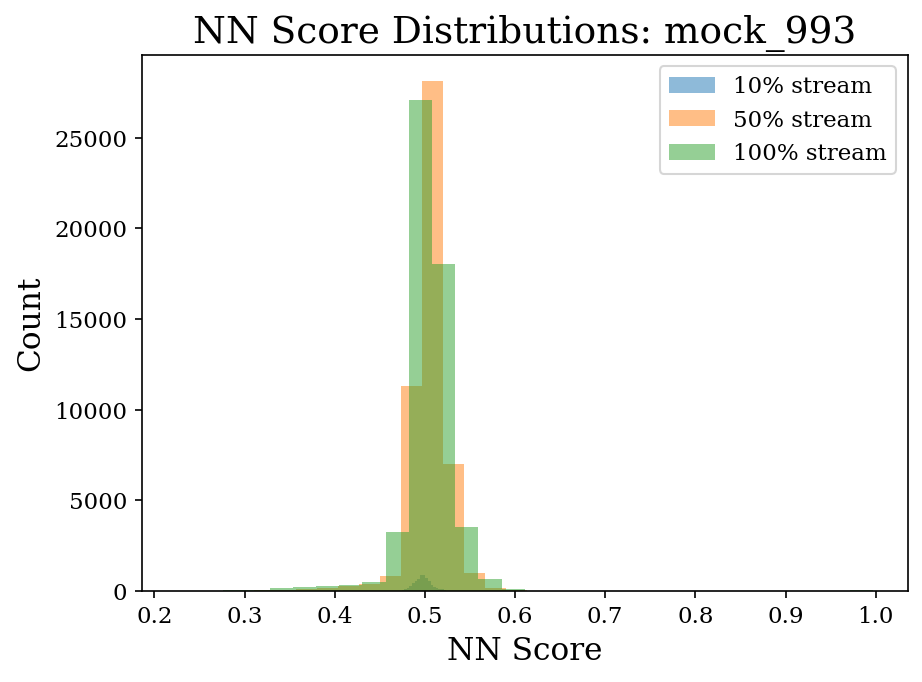

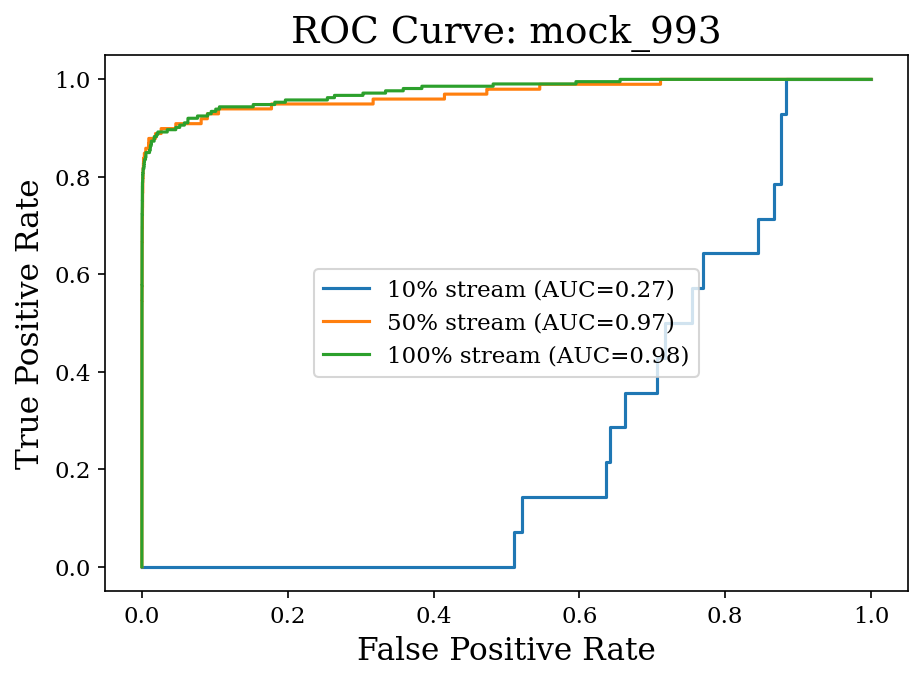

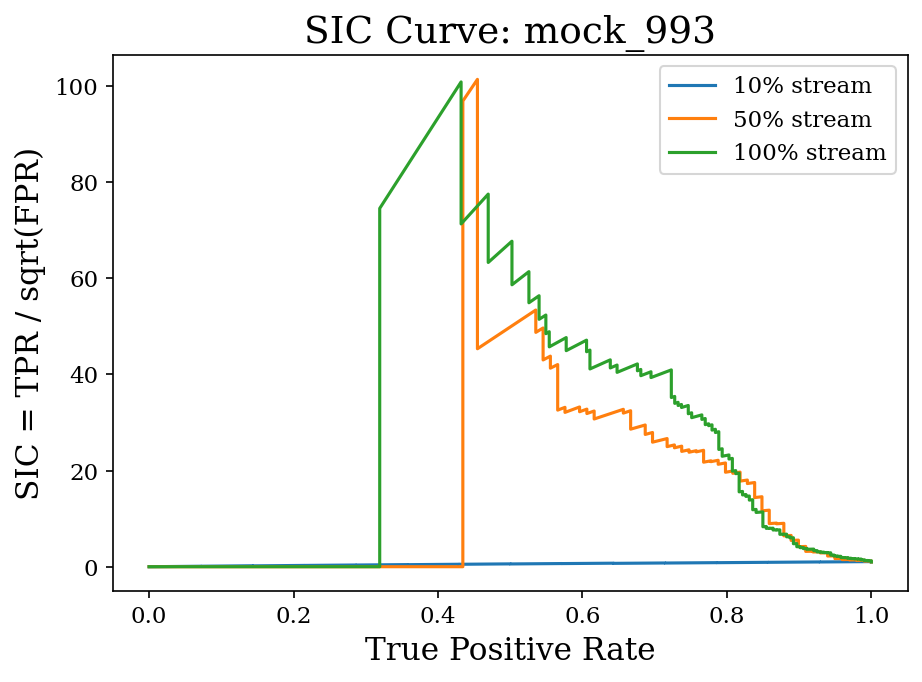


Plotting results for mock_995


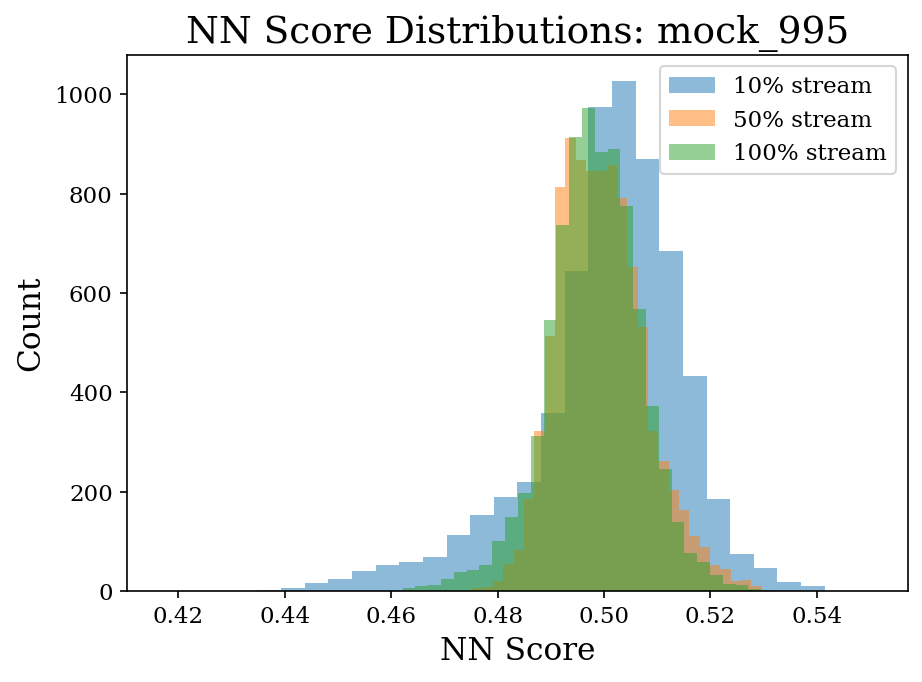

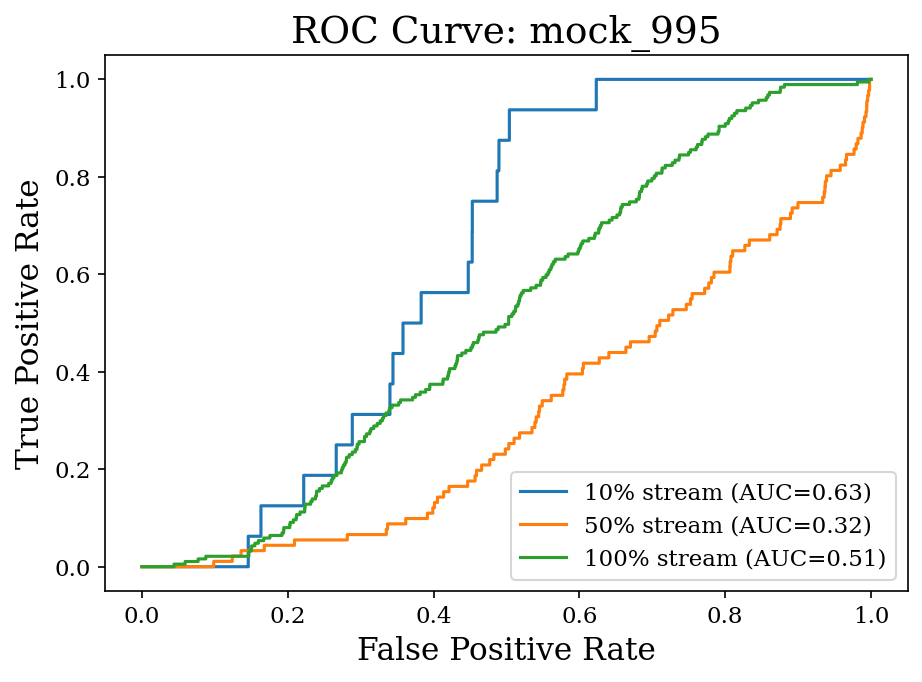

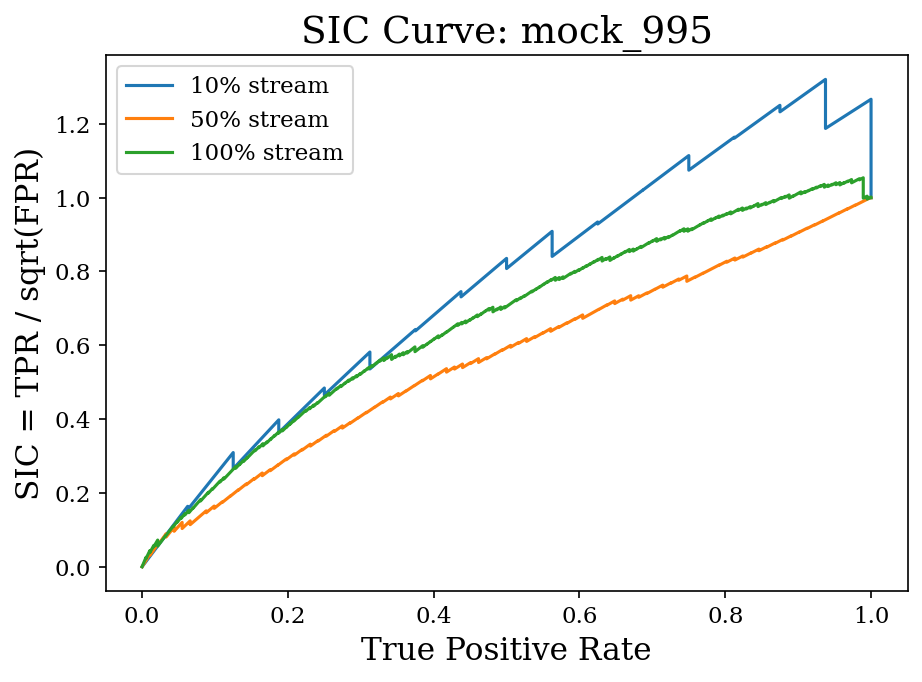


Plotting results for mock_997


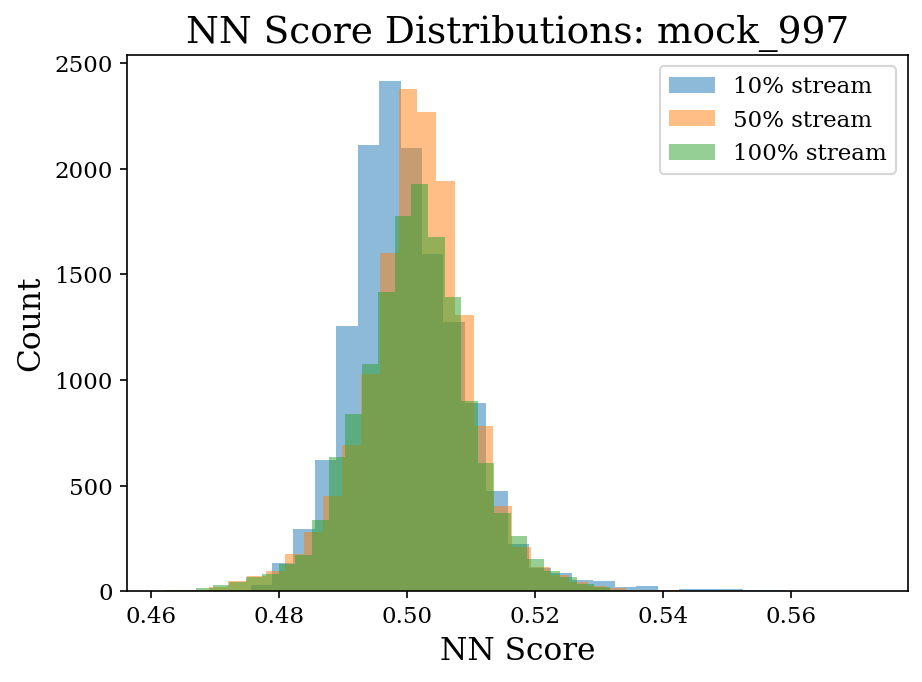

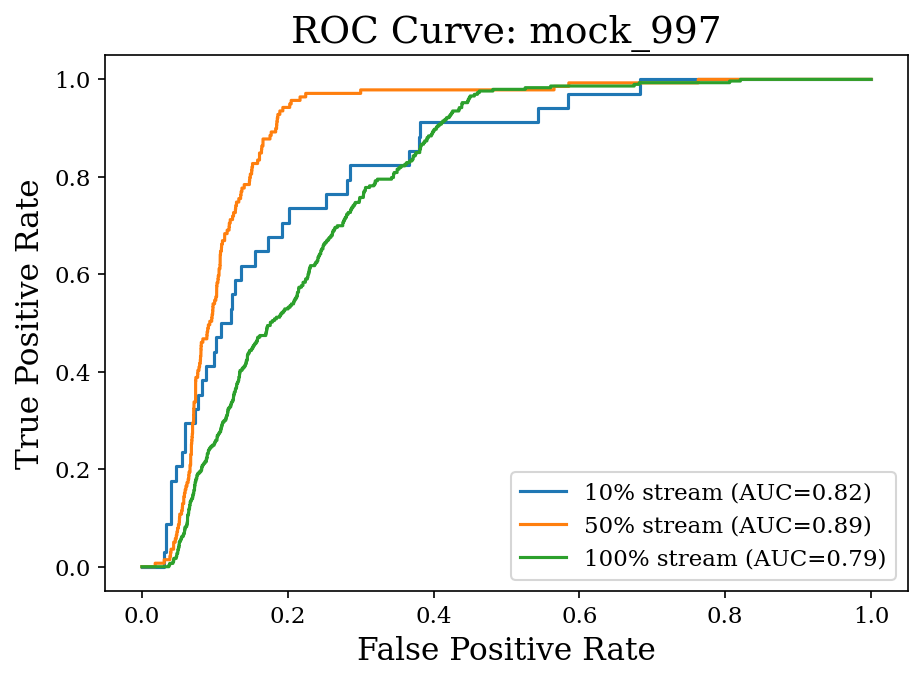

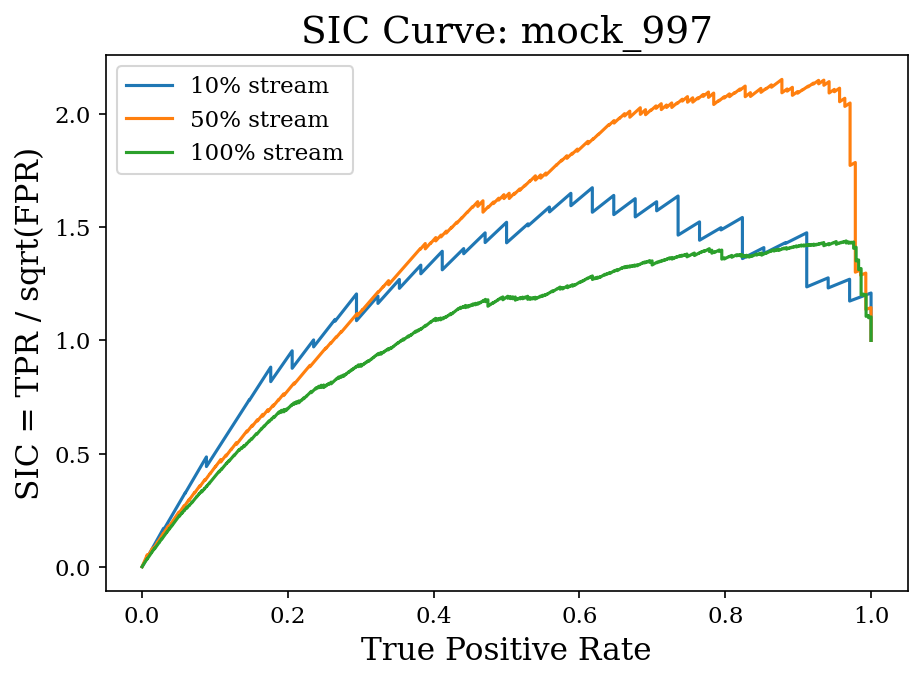

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Setup
stream_names = ['mock_993', 'mock_995', 'mock_997']
stream_percentages = [0.1, 0.5, 1.0]
base_dir = "/global/cfs/projectdirs/m3246/mgolshan/last_20"

for name in stream_names:
    roc_curves = {}
    sic_curves = {}
    auc_scores = {}
    nn_distributions = {}

    for perc in stream_percentages:
        folder = f"{name}_{int(perc * 100)}percent_run1"
        df_path = os.path.join(base_dir, folder, "kfold_0", "df_test.h5")

        if not os.path.exists(df_path):
            print(f"Missing: {df_path}")
            continue

        df = pd.read_hdf(df_path, key="df")
        df["stream"] = df["stream"].astype(bool)

        y_true = df["stream"].to_numpy()
        y_score = df["nn_score"].to_numpy()

        # Compute metrics
        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc = roc_auc_score(y_true, y_score)

        with np.errstate(divide='ignore', invalid='ignore'):
            sic = np.divide(tpr, np.sqrt(fpr))
            sic[np.isnan(sic)] = 0
            sic[np.isinf(sic)] = 0

        label = f"{int(perc * 100)}% stream"
        roc_curves[label] = (fpr, tpr)
        sic_curves[label] = (tpr, sic)
        auc_scores[label] = auc
        nn_distributions[label] = y_score

    # ========== PLOTS ==========
    print(f"\nPlotting results for {name}")

    # NN Score Distribution
    plt.figure(dpi=150)
    for label, scores in nn_distributions.items():
        plt.hist(scores, bins=30, alpha=0.5, label=label)
    plt.title(f"NN Score Distributions: {name}")
    plt.xlabel("NN Score")
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ROC Curve
    plt.figure(dpi=150)
    for label, (fpr, tpr) in roc_curves.items():
        auc = auc_scores[label]
        plt.plot(fpr, tpr, label=f"{label} (AUC={auc:.2f})")
    plt.title(f"ROC Curve: {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # SIC Curve
    plt.figure(dpi=150)
    for label, (tpr, sic) in sic_curves.items():
        plt.plot(tpr, sic, label=label)
    plt.title(f"SIC Curve: {name}")
    plt.xlabel("True Positive Rate")
    plt.ylabel("SIC = TPR / sqrt(FPR)")
    plt.legend()
    plt.tight_layout()
    plt.show()

